# Experiment 2.6
Preliminary HPO exploration for Transformer because never really done before for TS

General takeaways from preliminary analysis:
Smaller models: larger lr is best (lr > 0.001)
Larger models: lr 0.0005 or 0.0001
Small horizon: bs 32
Large horizon: bs 64

Goal:</br>
HPO of Transformer on ftS load, pred_len=24 </br>

Result: </br>


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.10'

In [5]:
#%%python3 -u create_hpo_tables.py --exp_name "Exp2.4"

## Import data and plot all benchmark results

In [6]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp2.10.1_metrics.csv", index_col=0)

In [7]:
hpo_table.sum(axis=0)

learning_rate       0.004300
batch_size        576.000000
e_layers           38.000000
d_layers           18.000000
d_model          9728.000000
seq_len          2208.000000
pred_len         3240.000000
MSE                 1.226215
MAE                 3.250010
Epochs            146.000000
Time[min]          58.000000
Params[Mio.]      100.580000
Max_mem[MB]      5663.800000
dtype: float64

In [8]:
hpo_table.groupby("Params[Mio.]").mean()

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,MSE,MAE,Epochs,Time[min],Max_mem[MB]
Params[Mio.],,,,,,,,,,,,
1.06,0.00010,32.0,2.0,1.0,256.0,96.0,24.0,0.036772,0.135049,12.0,3.0,113.530
1.14,0.00010,32.0,2.0,1.0,256.0,96.0,336.0,0.102564,0.232240,10.0,4.0,115.210
2.12,0.00010,32.0,1.0,1.0,512.0,96.0,24.0,0.033499,0.126823,10.0,2.0,173.190
2.28,0.00010,32.0,1.0,1.0,512.0,96.0,336.0,0.098572,0.229838,8.0,3.0,176.090
4.22,0.00035,32.0,2.0,1.0,512.0,144.0,24.0,0.034864,0.129503,8.2,3.2,302.844
4.38,0.00035,32.0,2.0,1.0,512.0,144.0,336.0,0.102743,0.232475,6.4,2.8,305.744
8.42,0.00010,32.0,4.0,1.0,512.0,96.0,24.0,0.038370,0.133470,15.0,7.0,396.060
8.58,0.00010,32.0,4.0,1.0,512.0,96.0,336.0,0.099868,0.231119,6.0,3.0,398.960
16.83,0.00010,32.0,2.0,1.0,1024.0,96.0,24.0,0.035121,0.129569,6.0,3.0,620.680


<Axes: title={'center': 'MSE'}, xlabel='Params[Mio.]'>

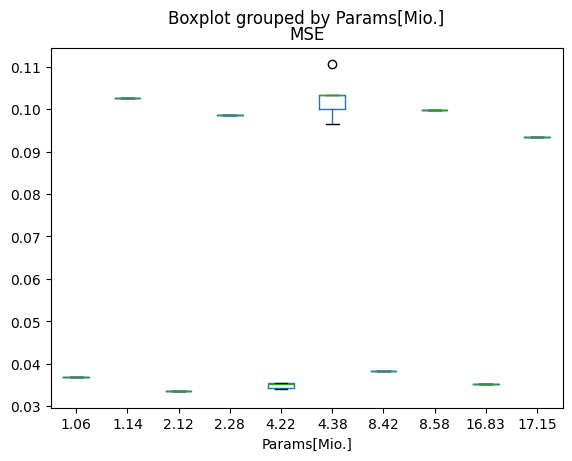

In [9]:
hpo_table.boxplot(by="Params[Mio.]", column="MSE", grid=False)

In [10]:
hpo_table[hpo_table["MSE"]<0.08].groupby("e_layers").mean()

,learning_rate,batch_size,d_layers,d_model,seq_len,pred_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
e_layers,,,,,,,,,,,,
1,0.000100,32.0,1.0,512.000000,96.000000,24.0,0.033499,0.126823,10.000000,2.000000,2.12,173.190000
2,0.000279,32.0,1.0,548.571429,130.285714,24.0,0.035173,0.130304,8.428571,3.142857,5.57,321.204286
4,0.000100,32.0,1.0,512.000000,96.000000,24.0,0.038370,0.133470,15.000000,7.000000,8.42,396.060000


In [11]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df.head(50)

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
2,0.00010,32,1,1,512,96,24,0.033499,0.126823,10,2,2.12,173.19
14,0.00050,32,2,1,512,96,24,0.034101,0.129010,7,2,4.22,242.06
6,0.00010,32,2,1,512,96,24,0.034213,0.127232,9,3,4.22,242.06
10,0.00010,32,2,1,1024,96,24,0.035121,0.129569,6,3,16.83,620.68
16,0.00100,32,2,1,512,96,24,0.035188,0.130639,7,2,4.22,242.06
8,0.00010,32,2,1,512,336,24,0.035398,0.130241,9,7,4.22,545.98
0,0.00005,32,2,1,512,96,24,0.035420,0.130391,9,2,4.22,242.06
4,0.00010,32,2,1,256,96,24,0.036772,0.135049,12,3,1.06,113.53
12,0.00010,32,4,1,512,96,24,0.038370,0.133470,15,7,8.42,396.06
11,0.00010,32,2,1,1024,96,336,0.093413,0.222014,6,3,17.15,627.14


In [12]:
best_mse = sorted_df.iloc[0]["MSE"]
best_mse

0.0334992781281471

## Learning rate vs MSE

In [13]:
list(hpo_table["Params[Mio.]"].value_counts().sort_index().index)

[1.06, 1.14, 2.12, 2.28, 4.22, 4.38, 8.42, 8.58, 16.83, 17.15]

## Params[Mio.] vs MSE

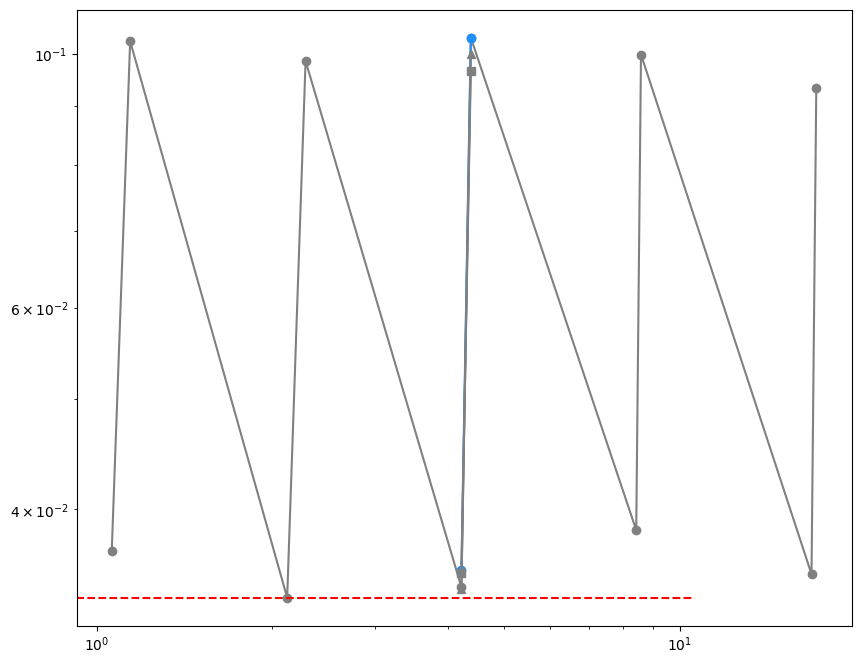

In [14]:
colors = {96: "grey", 336: "dodgerblue", 128: "darkblue"}
markers = {0.0001: 'o', 0.0005: '^', 0.001: 's', 0.005: 'h'}
seq_lens = [96, 336]
#model_sizes = [10.5, 1.6, 0.7, 0.0]
learning_rates = [0.0001, 0.0005, 0.001, 0.005]

hpo_table.sort_values(by="Params[Mio.]", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for lr in learning_rates:
    for sl in seq_lens:
        hpo_table_subset = hpo_table[(hpo_table["seq_len"] == sl) & (hpo_table["learning_rate"] == lr)]
        #print(hpo_table_subset)
        ax.plot(hpo_table_subset["Params[Mio.]"], hpo_table_subset["MSE"], color=colors[sl], marker=markers[lr])

ax.set_yscale("log")
ax.hlines(best_mse, 0,10.5, color="red", linestyles="--")
#ax.set_ylim(0.02, 0.08)
ax.set_xscale("log")
#ax.set_yscale("log")



In [15]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,seq_len,pred_len,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
4,0.00010,32,2,1,256,96,24,0.036772,0.135049,12,3,1.06,113.53
5,0.00010,32,2,1,256,96,336,0.102564,0.232240,10,4,1.14,115.21
2,0.00010,32,1,1,512,96,24,0.033499,0.126823,10,2,2.12,173.19
3,0.00010,32,1,1,512,96,336,0.098572,0.229838,8,3,2.28,176.09
14,0.00050,32,2,1,512,96,24,0.034101,0.129010,7,2,4.22,242.06
6,0.00010,32,2,1,512,96,24,0.034213,0.127232,9,3,4.22,242.06
16,0.00100,32,2,1,512,96,24,0.035188,0.130639,7,2,4.22,242.06
8,0.00010,32,2,1,512,336,24,0.035398,0.130241,9,7,4.22,545.98
0,0.00005,32,2,1,512,96,24,0.035420,0.130391,9,2,4.22,242.06
17,0.00100,32,2,1,512,96,336,0.096543,0.226201,6,2,4.38,244.96


In [16]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE", "seq_len", "e_layers", "d_model"]]
print(reduced_hpo_table.shape)

(18, 7)


In [17]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(10, 6))

    
    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    ynames = column_names if ynames is None else ynames
        
    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    # Normalize data
    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05
    dys = ymaxs - ymins
    dys = [dy if dy != 0 else 1 for dy in dys]

    print(dys)

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter for better visibility
    jitter_strength = 0.00005 
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, 0] = np.random.normal(0, 0.00005, zs[:, 0].shape)
    jitter[:, -1] = 0  # Don't jitter the last column
    zs += jitter
    zs[:, -3][zs[:, -3] < 0] = 0 # Avoid negative values

    # Create the parallel coordinates
    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
        ax.tick_params(axis='y', labelsize=18)
        ax.tick_params(axis='x', length=0)
            #ax.set_yscale('log')
        
    #axes[-1].set_yscale('log')
    

    host.set_xlim(0, ys.shape[1] - 1) 
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=18)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    #host.set_title('Parallel Coordinate Plot Transformer pred_len 24', fontsize=22)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    sm = ScalarMappable(norm=color_norm, cmap=cmap)
    sm.set_array([])

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)
    
    # Bring MSE axis to front (before color bar)
    axes[-1].set_zorder(10) 
    
    # Color bar
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="8%", pad=0.0)
    cbar = plt.colorbar(sm, cax=cax)
    cbar.ax.yaxis.set_ticks([])
  
    plt.tight_layout()
    plt.show()


[0.0010450000000000001, 844.8000000000001, 3.3000000000000003, 17.698999999999998, 264.0, 0.08484259545803063]


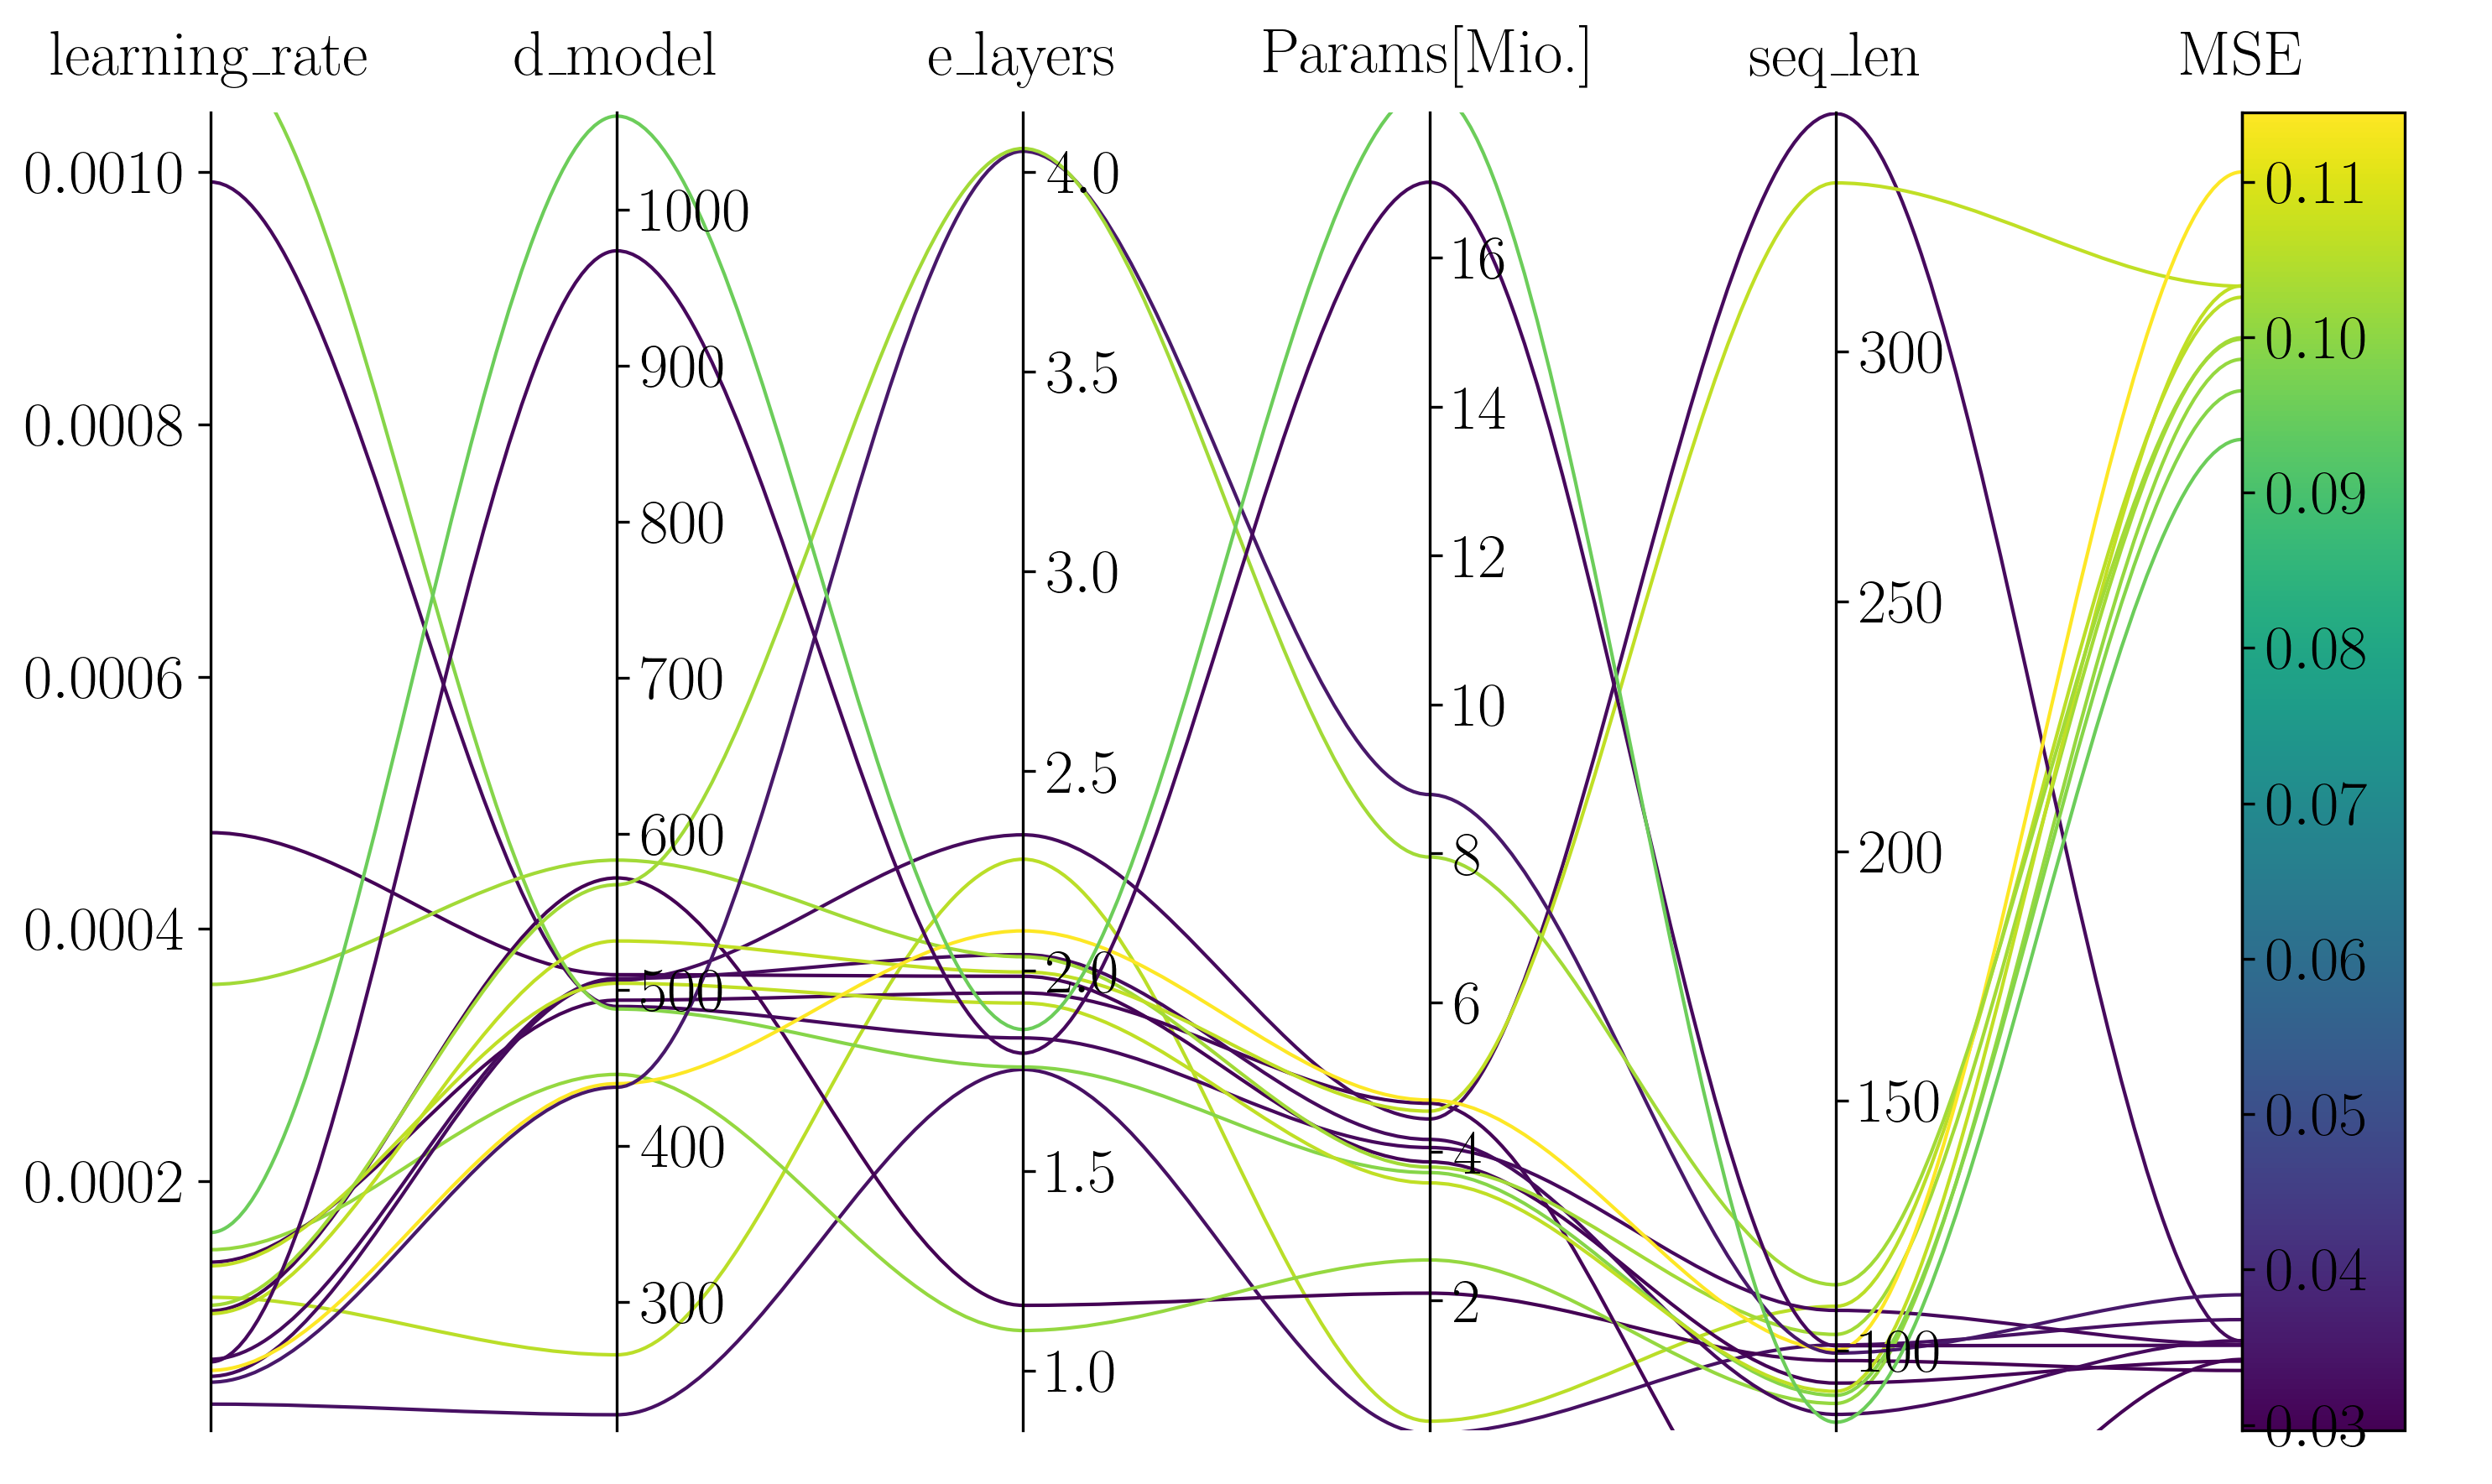

In [18]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"])

[0.0010450000000000001, 844.8000000000001, 3.3000000000000003, 17.346999999999998, 264.0, 0.005357370153069439]


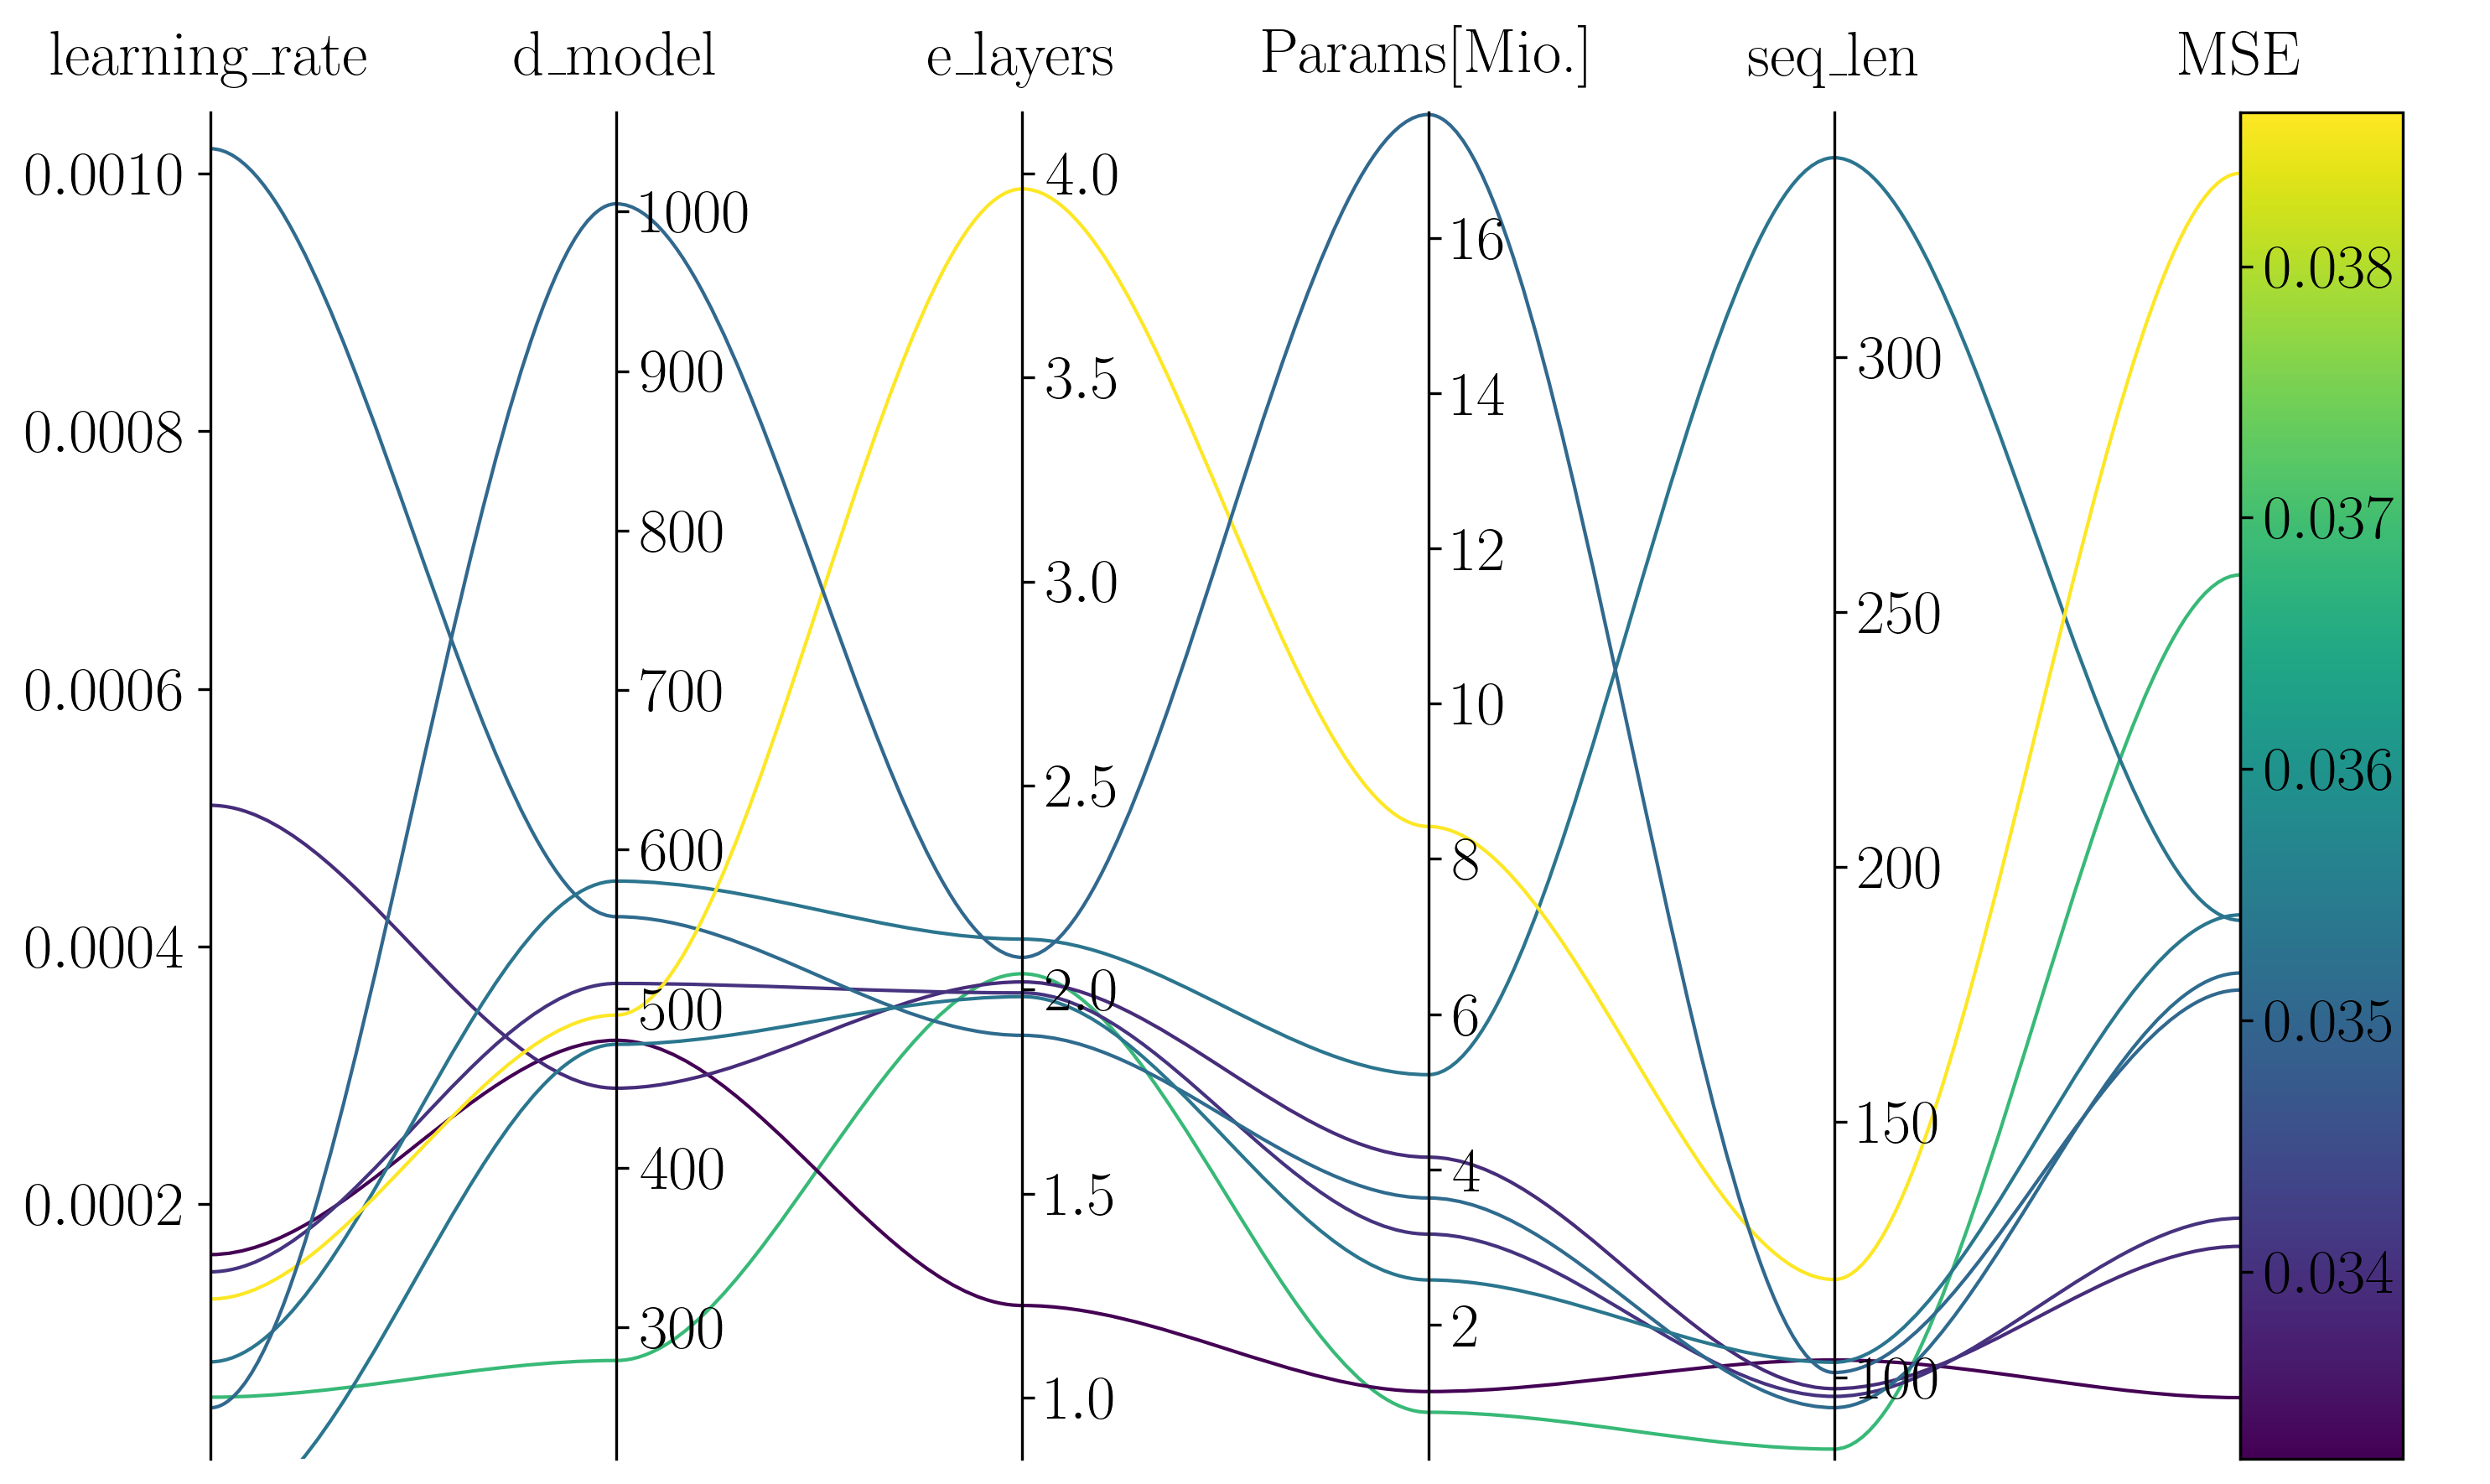

[0.0010450000000000001, 844.8000000000001, 3.3000000000000003, 17.346999999999998, 264.0, 0.005357370153069439]


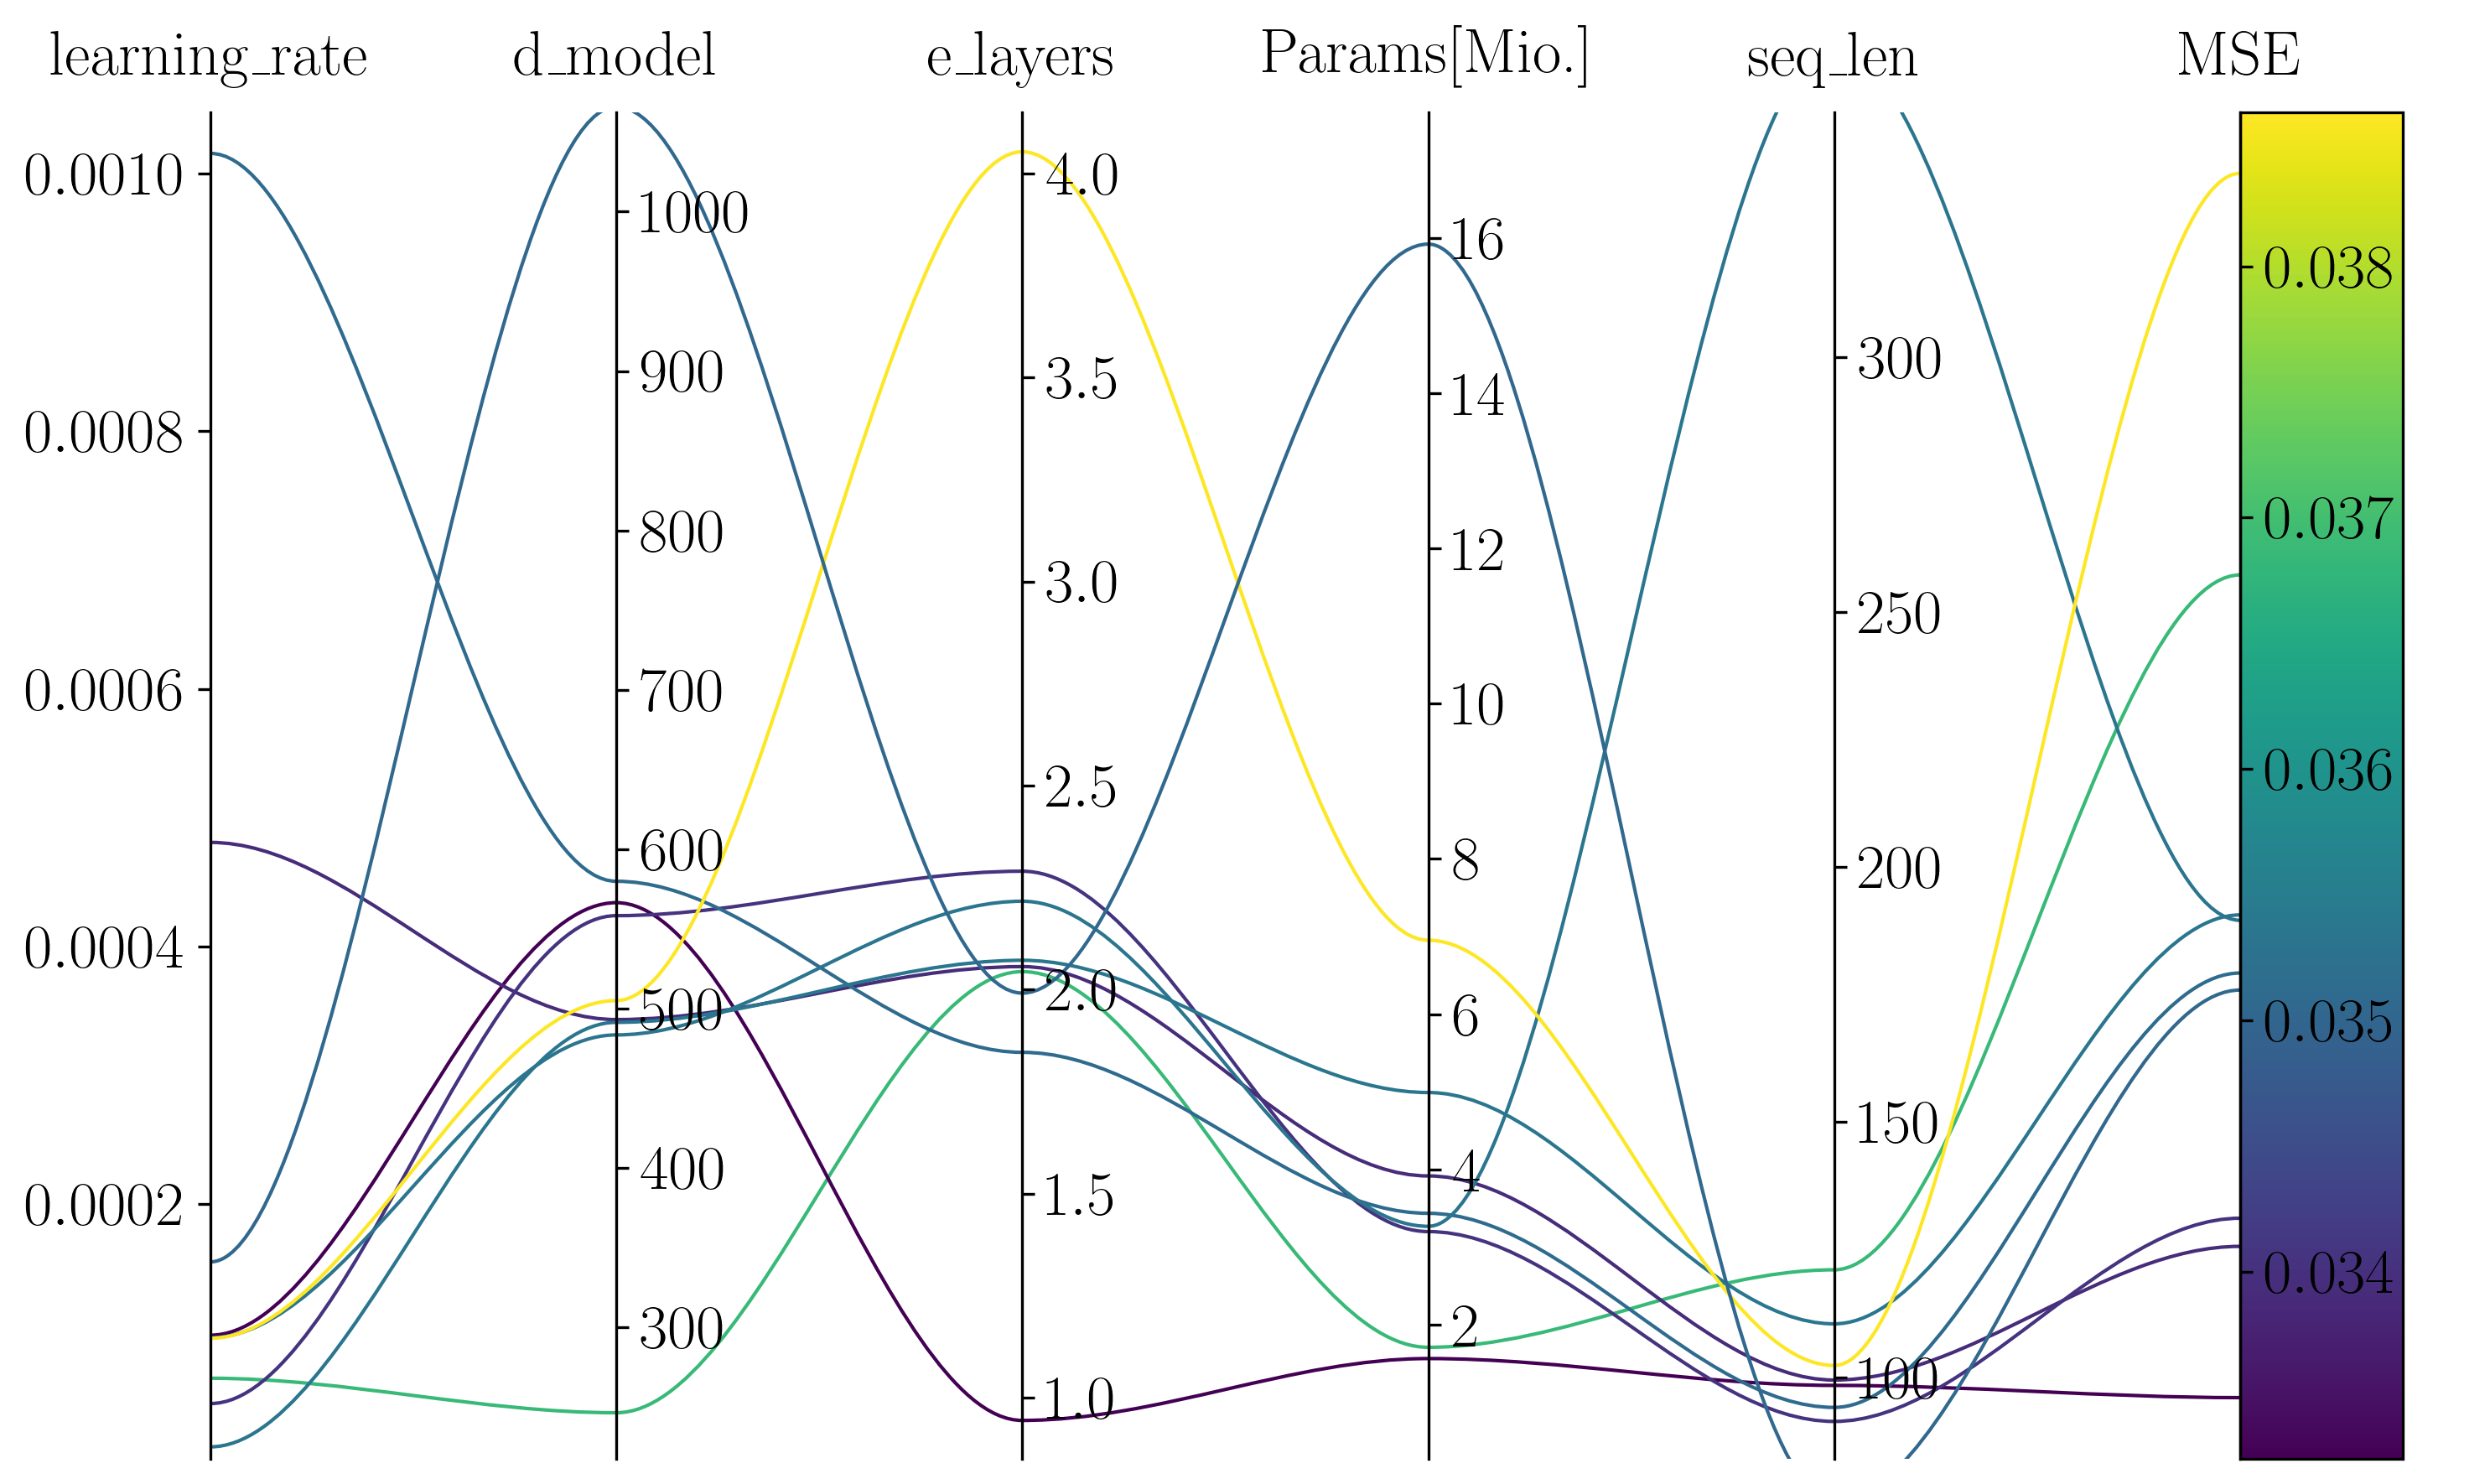

In [19]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.08)
parallel_coordinates(reduced_hpo_table, ["learning_rate", "d_model", "e_layers", "Params[Mio.]", "seq_len", "MSE"], threshold=0.075)

ValueError: zero-size array to reduction operation minimum which has no identity

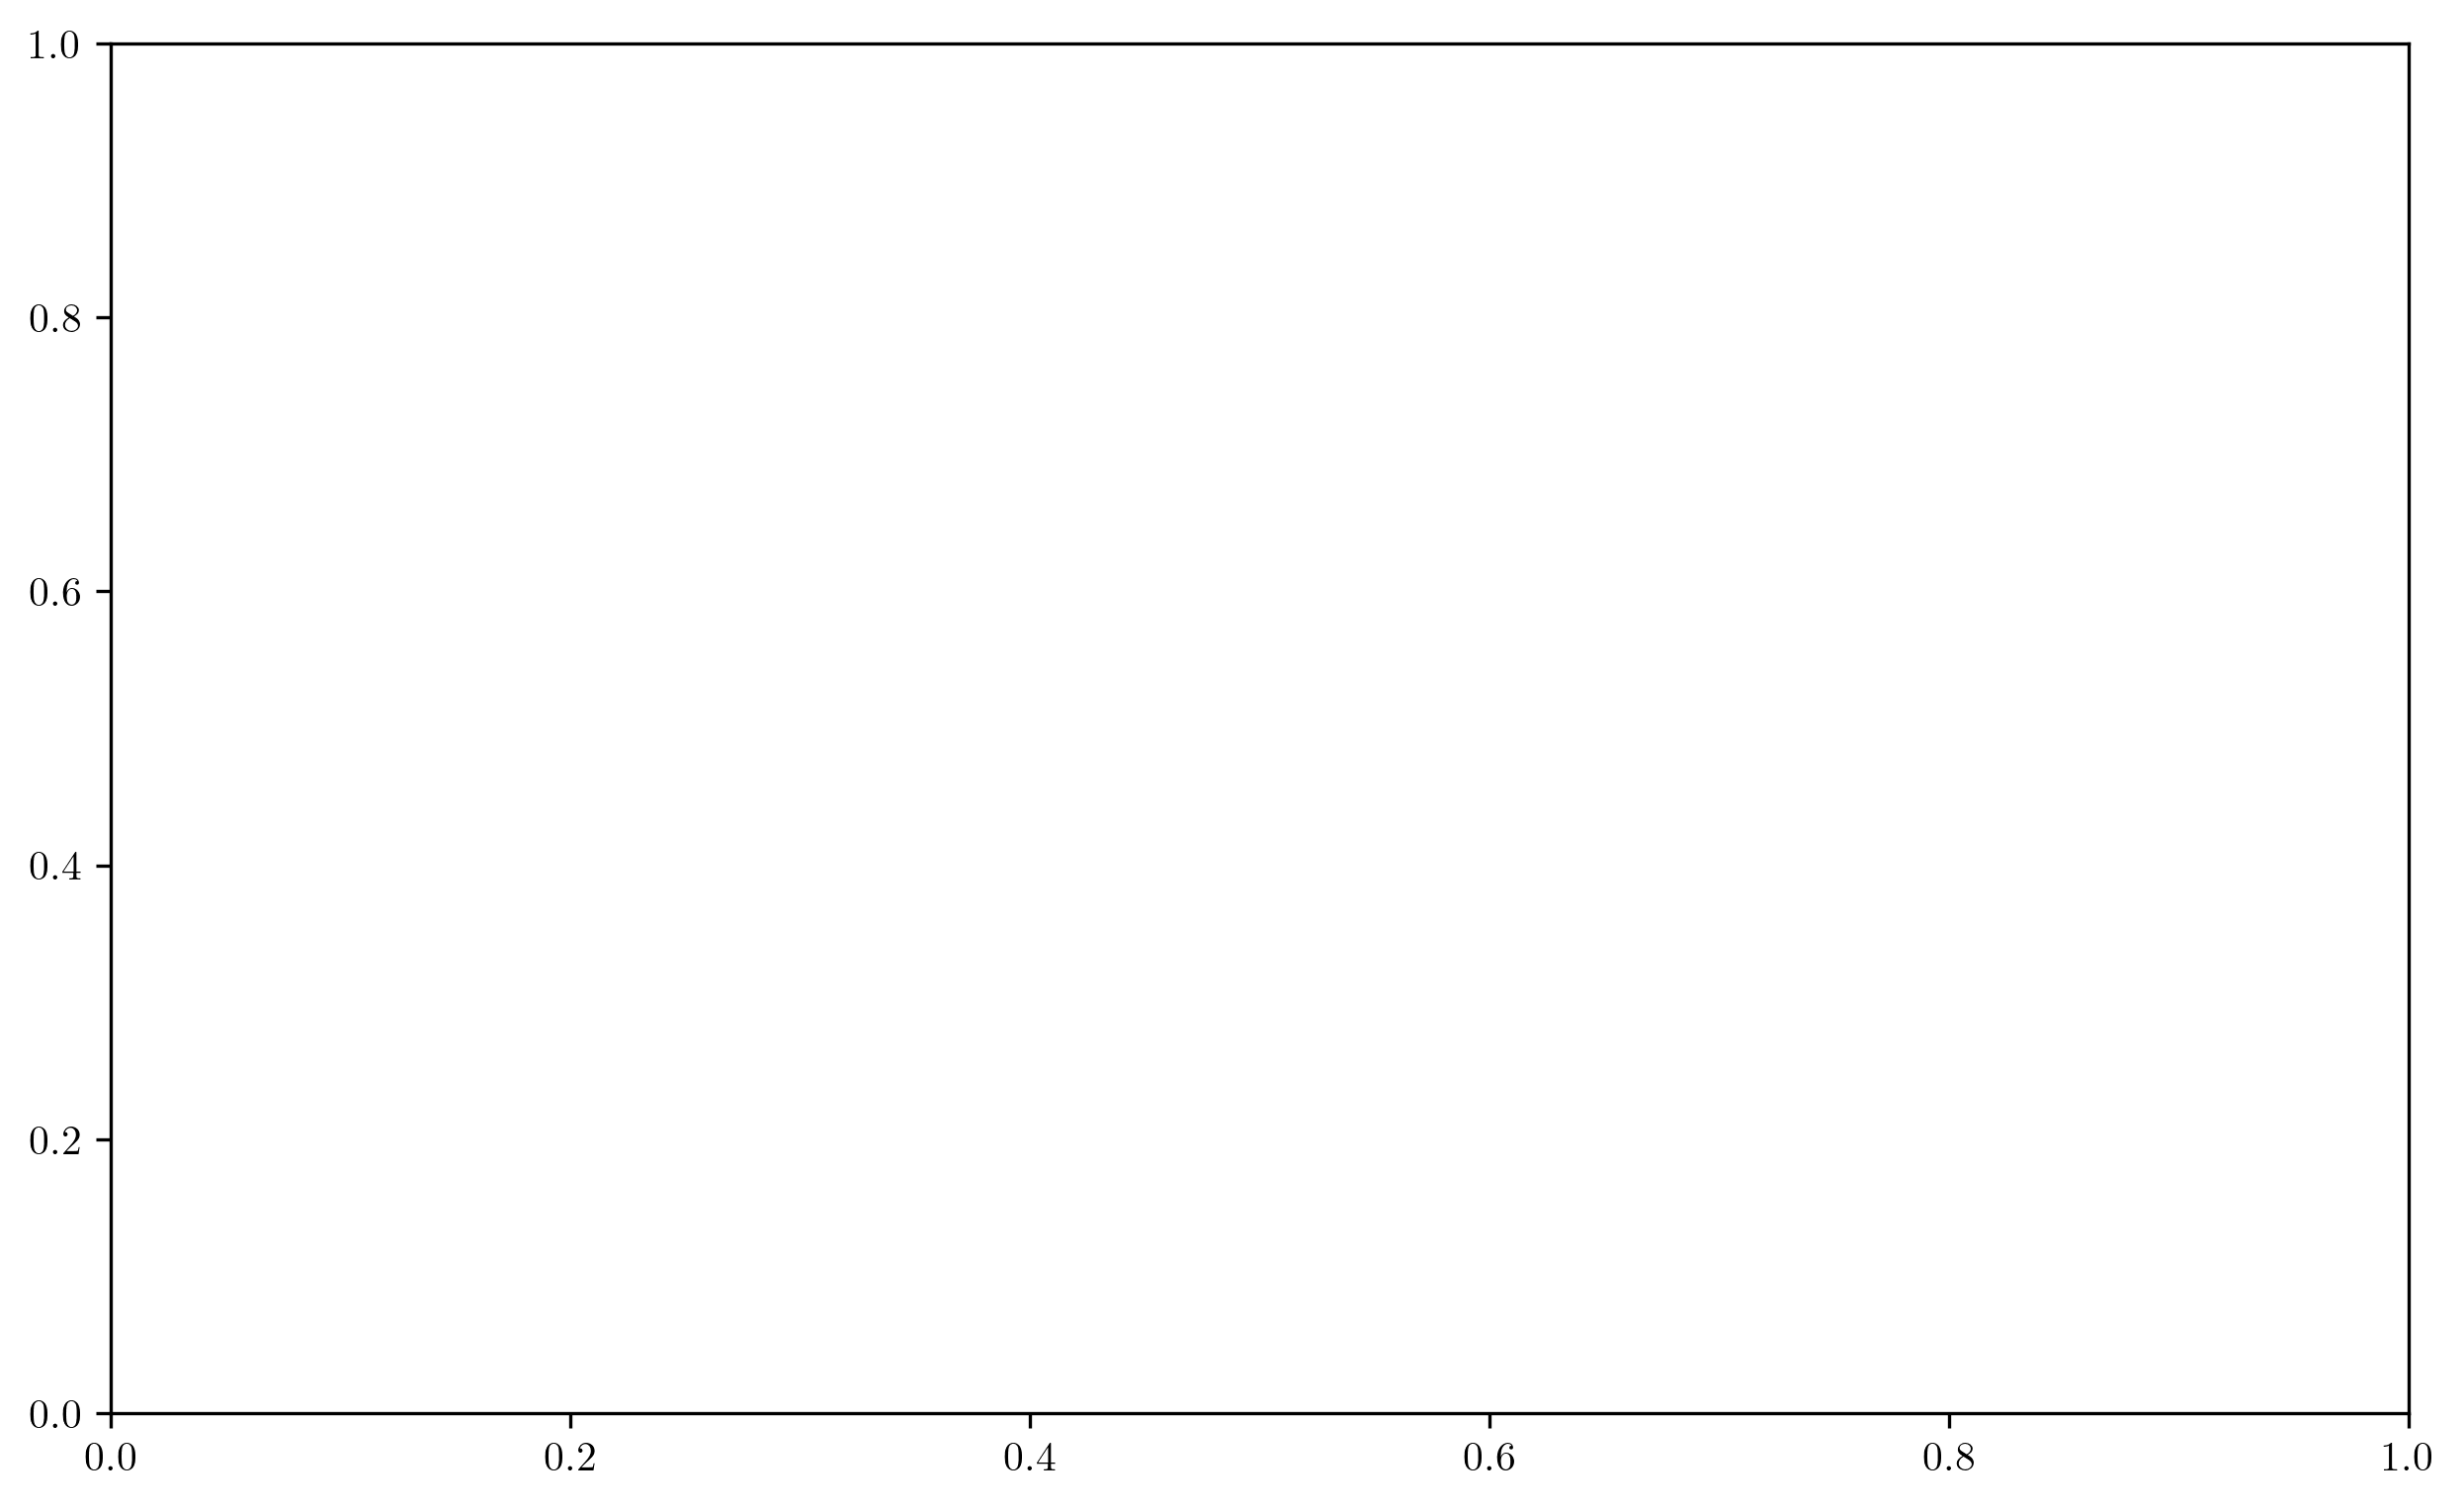

In [20]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.0], ["learning_rate", "batch_size", "MSE"])


ValueError: zero-size array to reduction operation minimum which has no identity

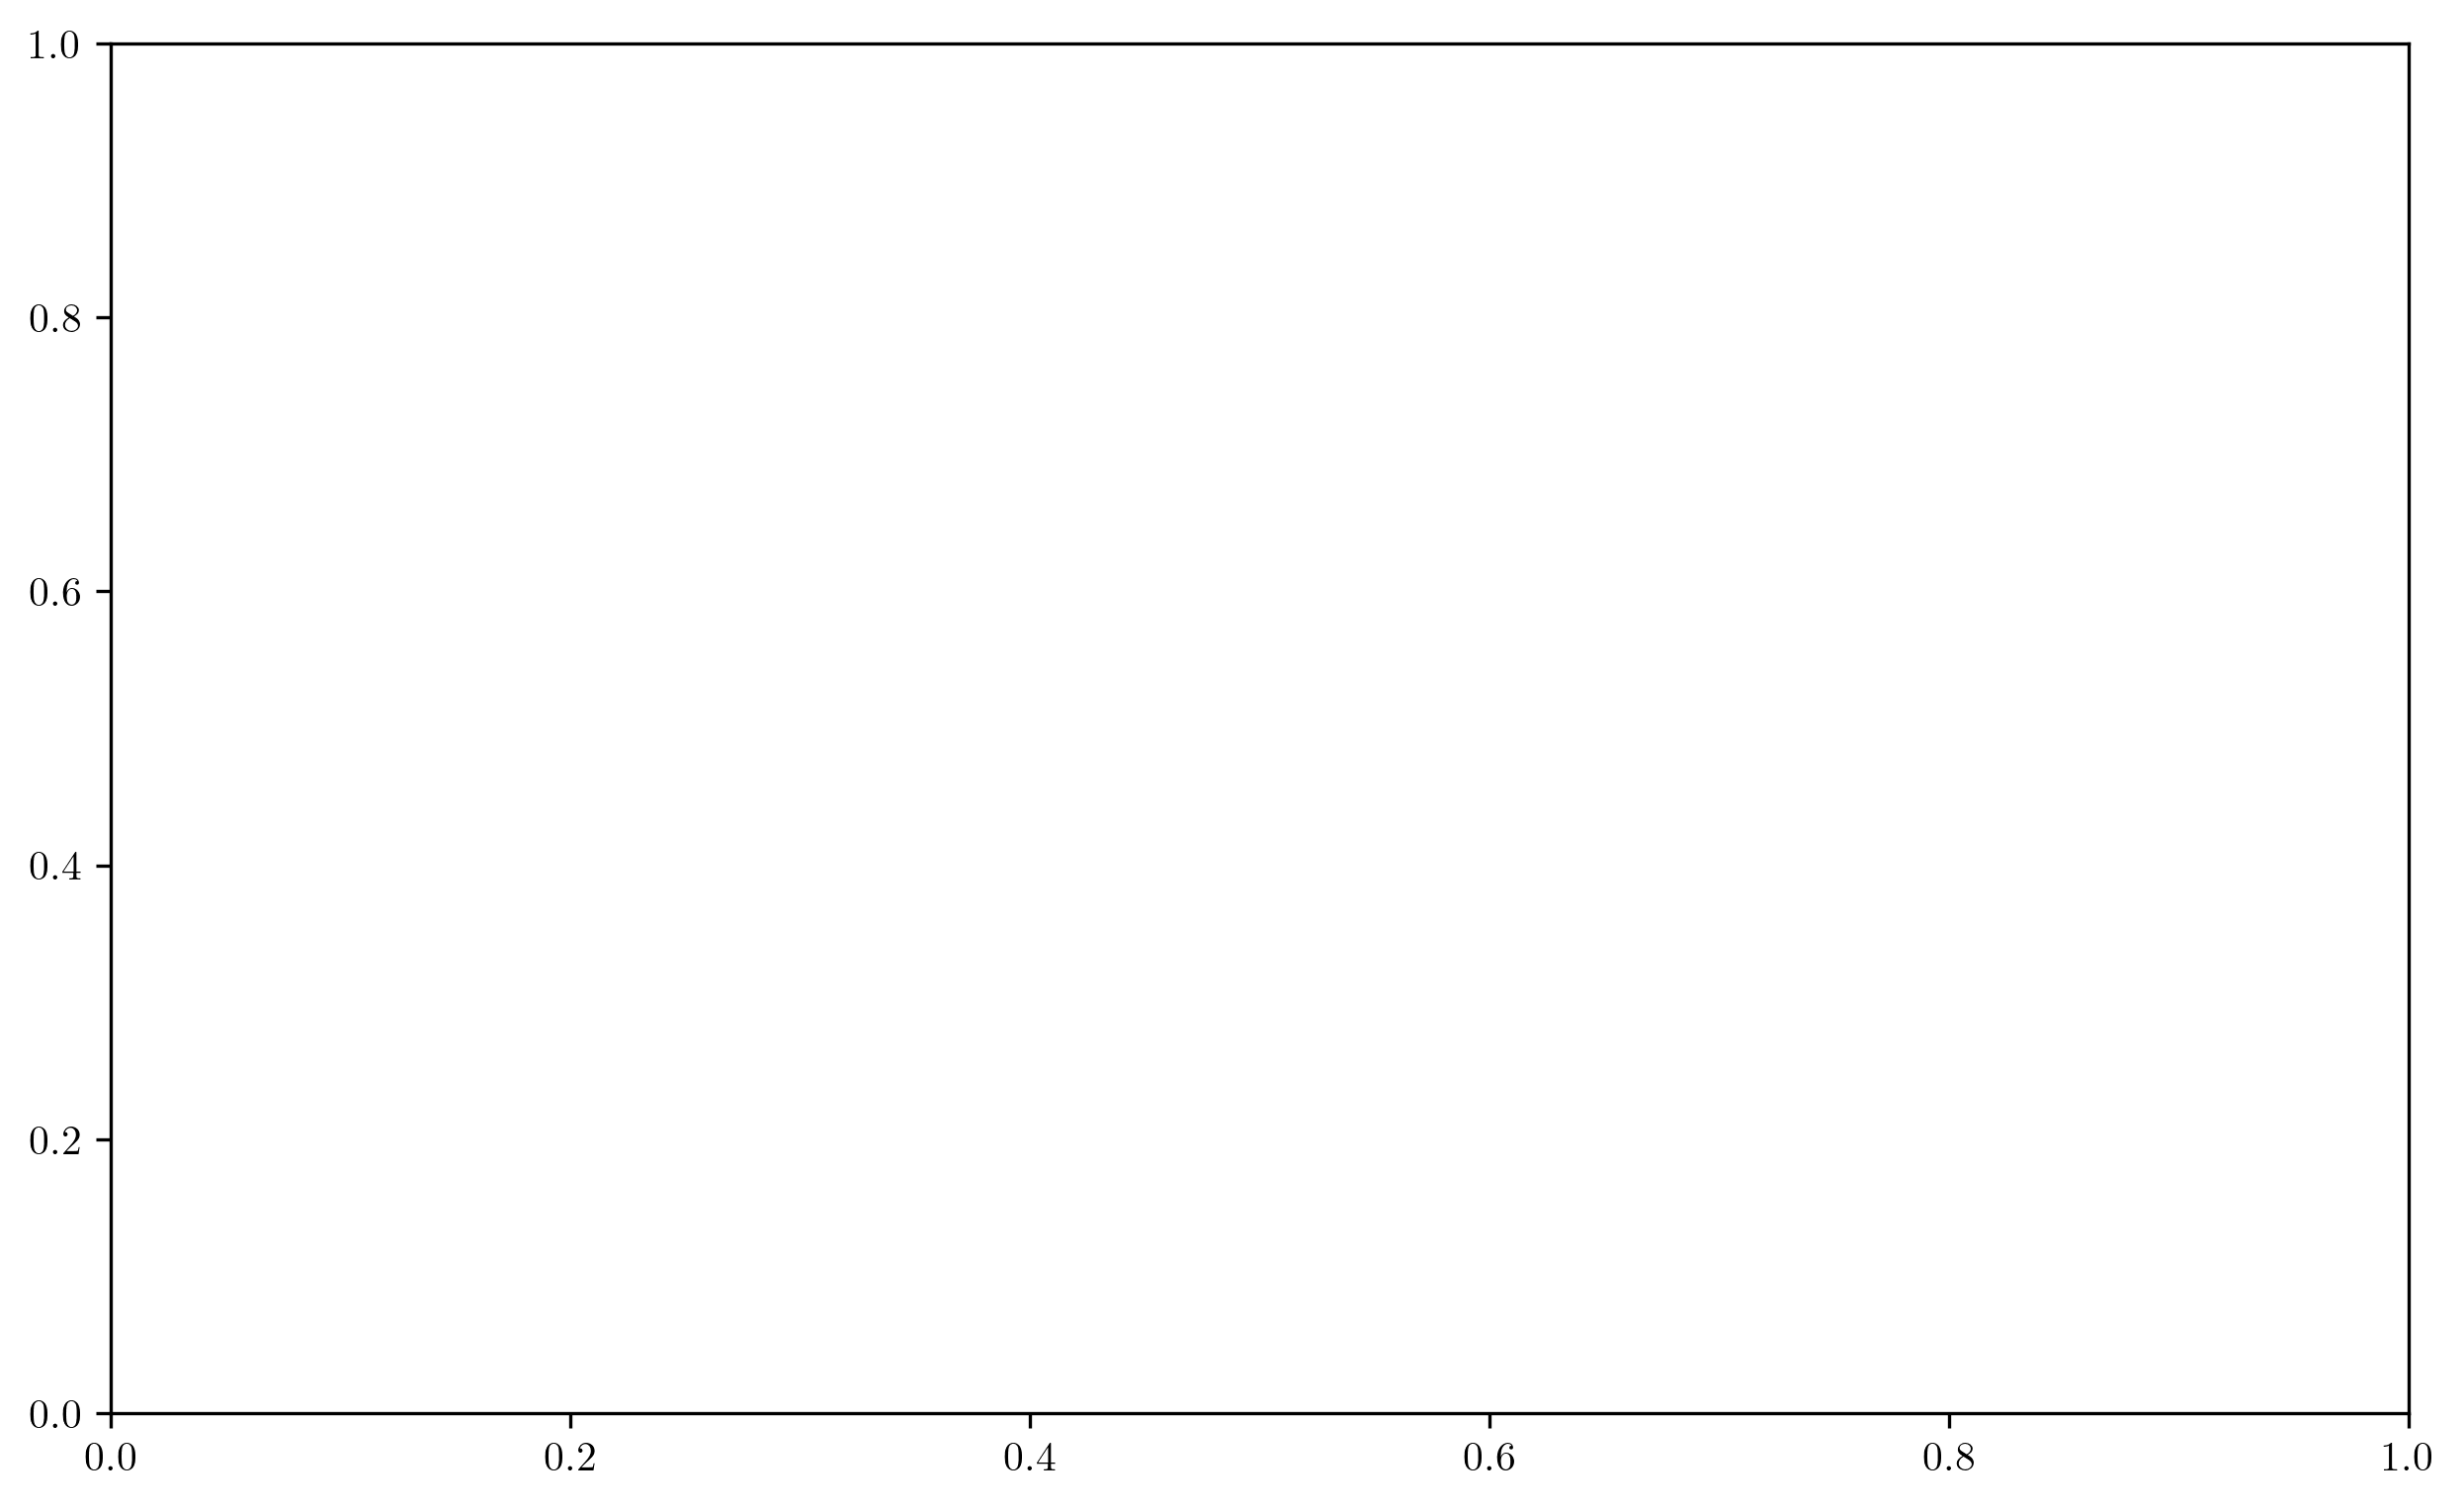

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.7], ["learning_rate", "batch_size", "MSE"])

ValueError: zero-size array to reduction operation minimum which has no identity

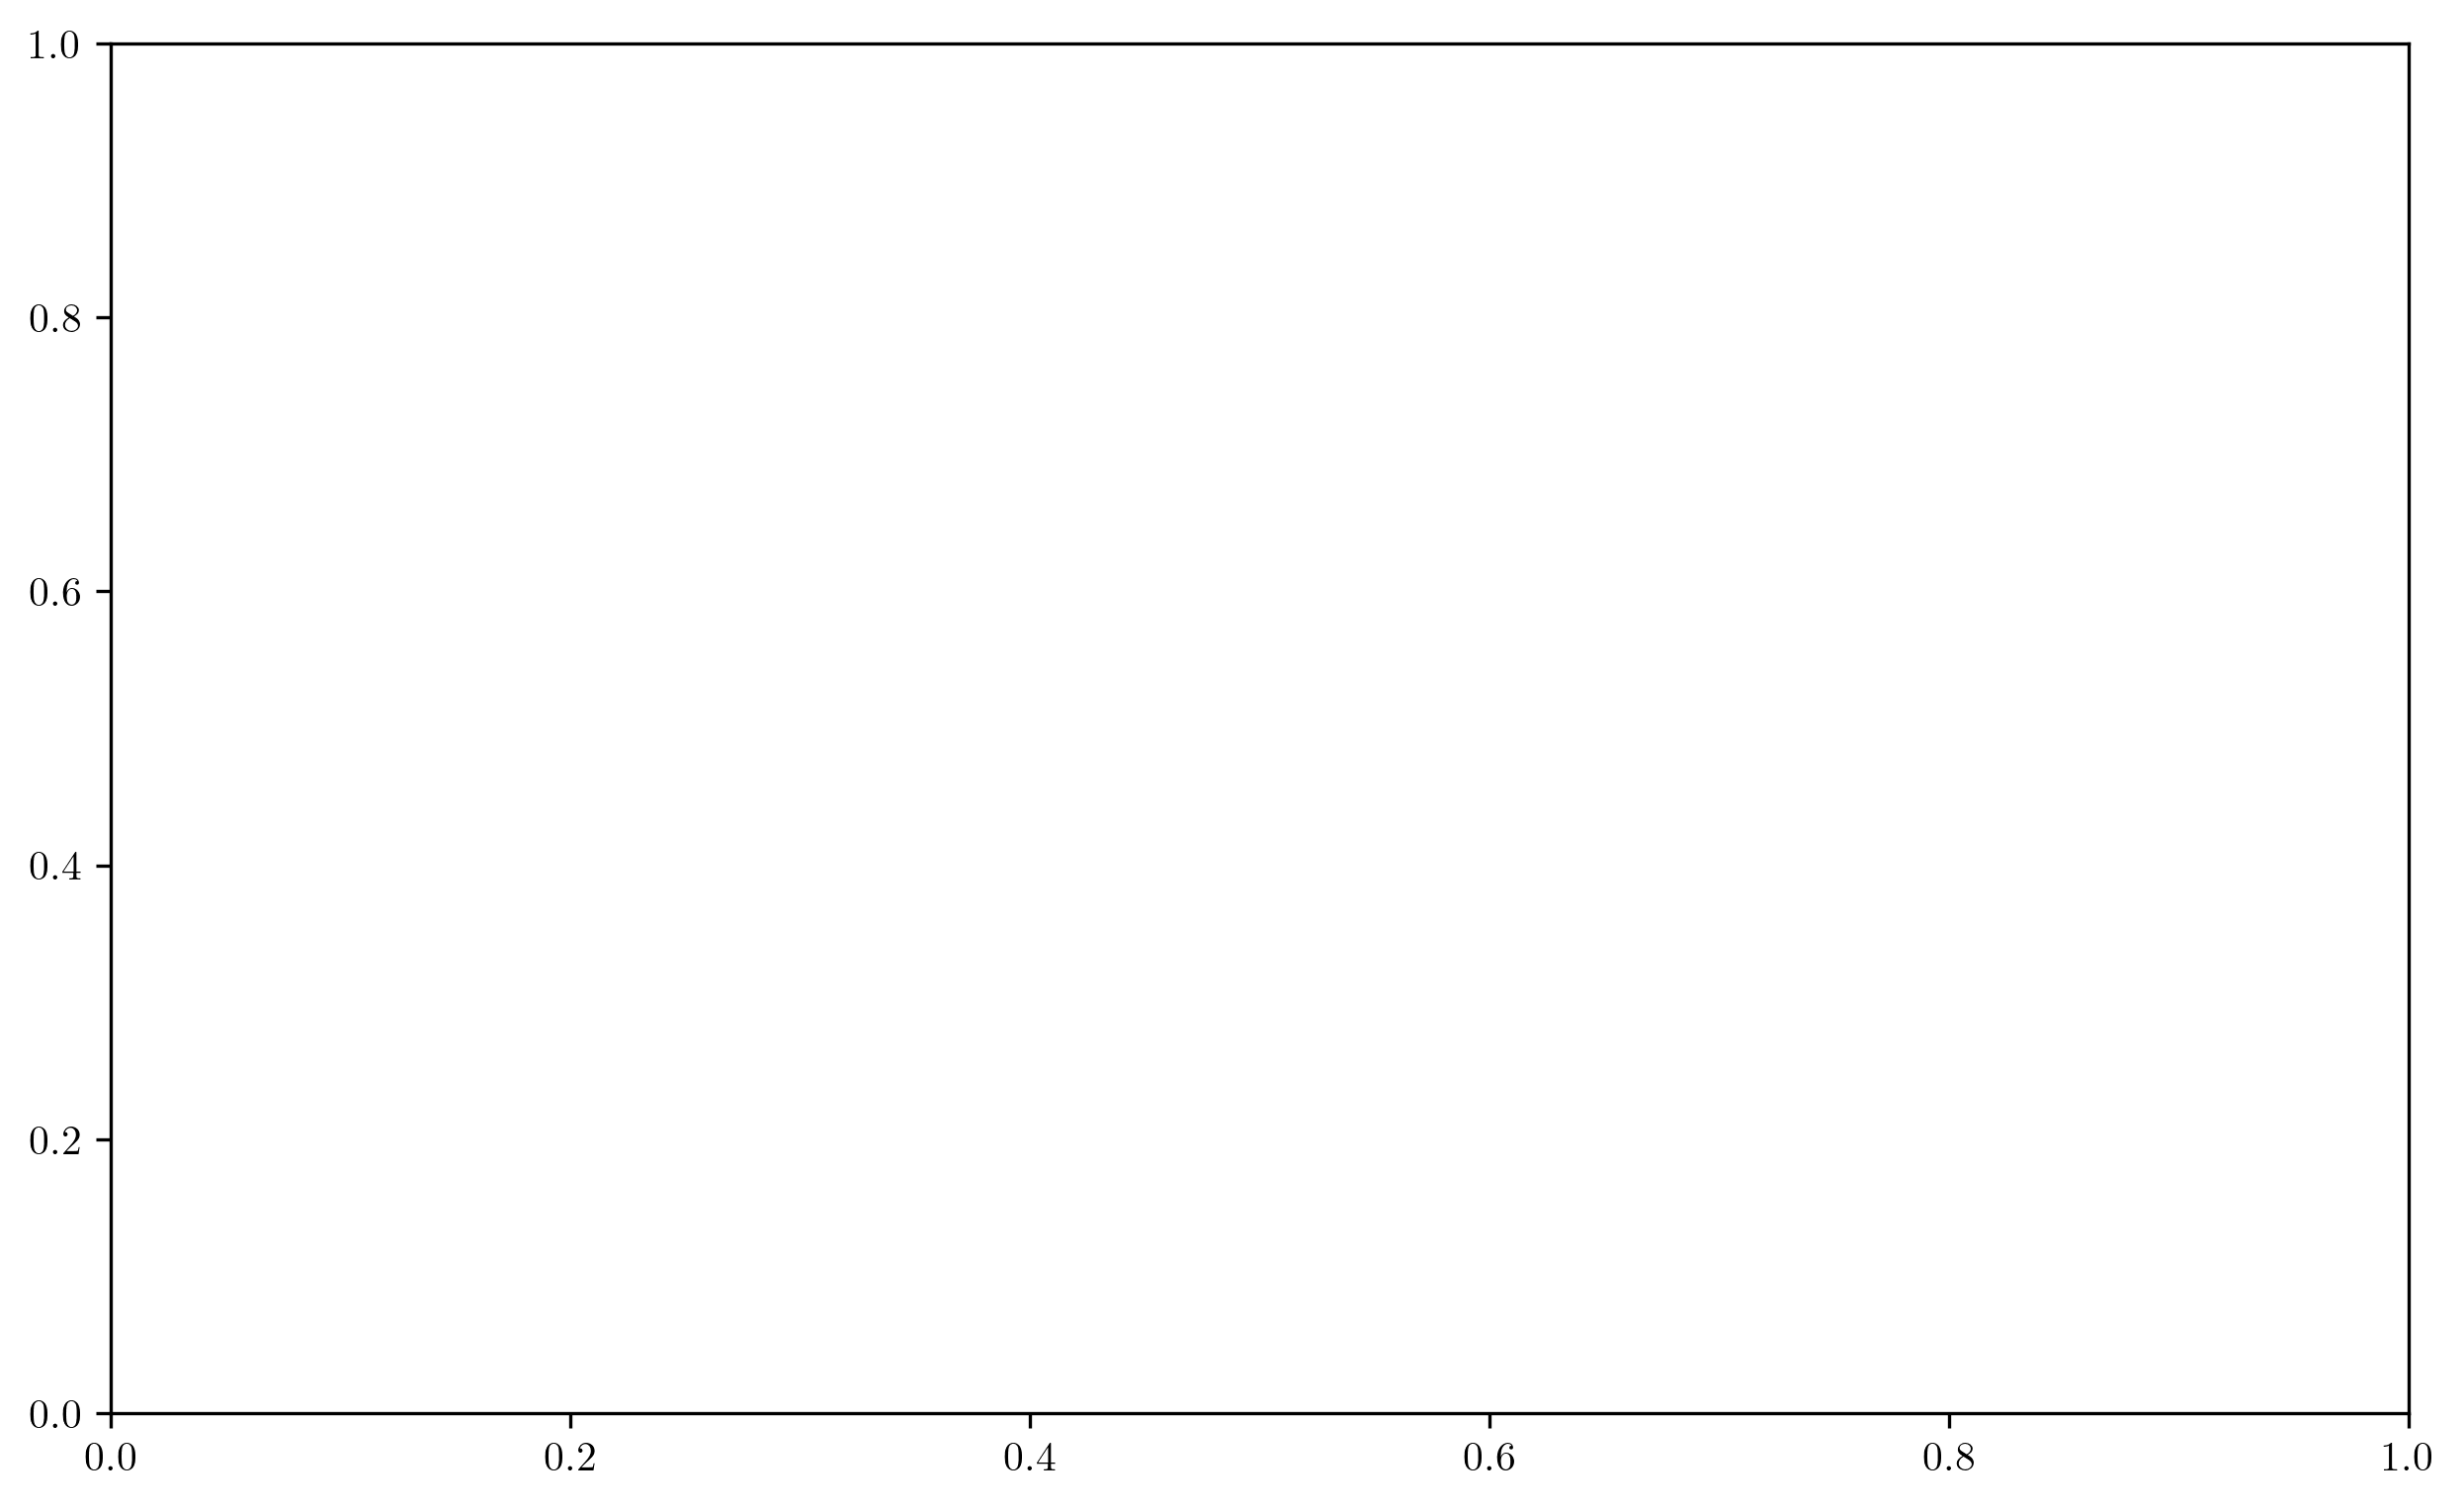

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"], threshold = 0.08)

(12, 3)


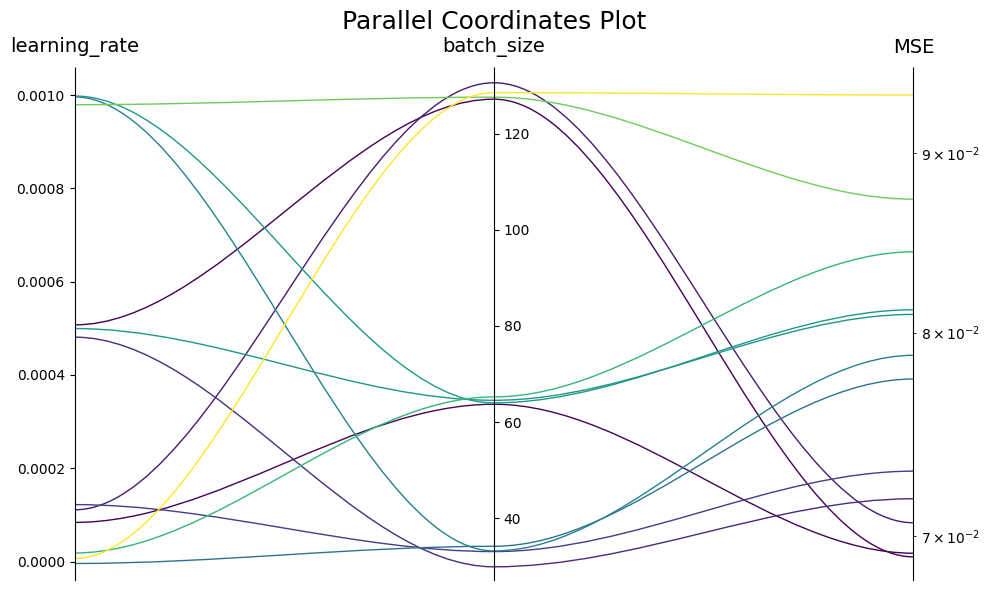

(7, 3)


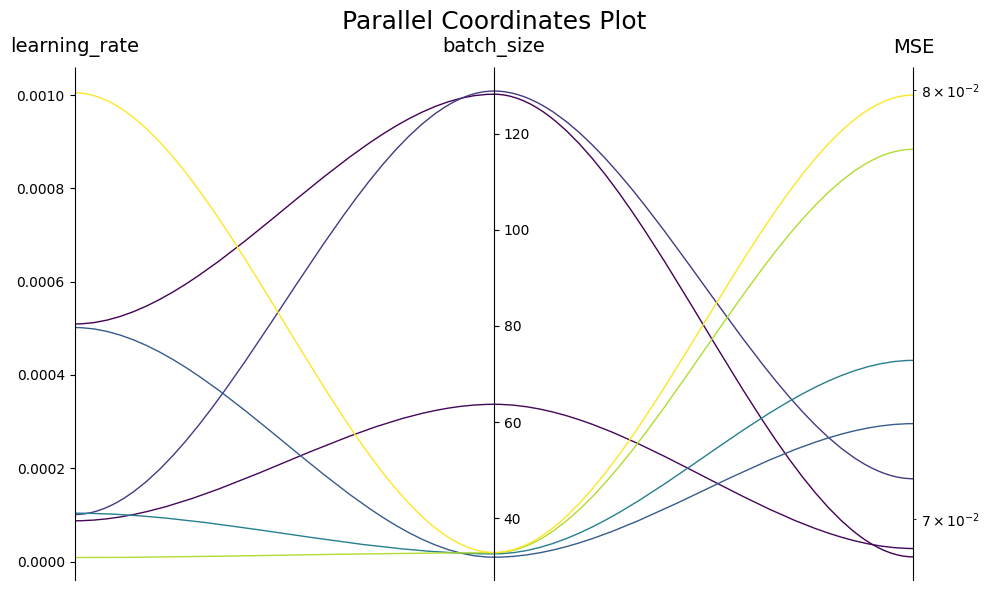

In [ ]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"], threshold=0.08)